In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\2.concerticcir1.csv", header=None)

In [3]:
data.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [4]:
data.shape
data.info()

(100, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
data.duplicated().value_counts()

False    100
dtype: int64

In [6]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

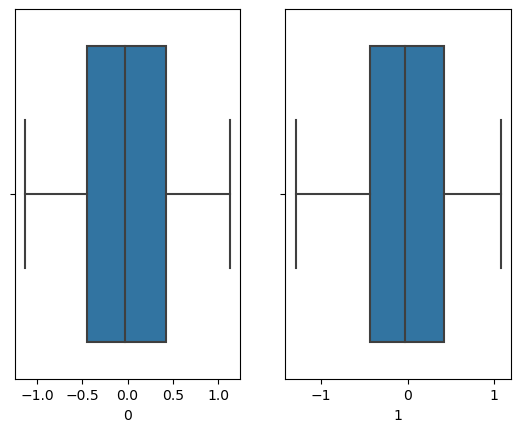

In [7]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

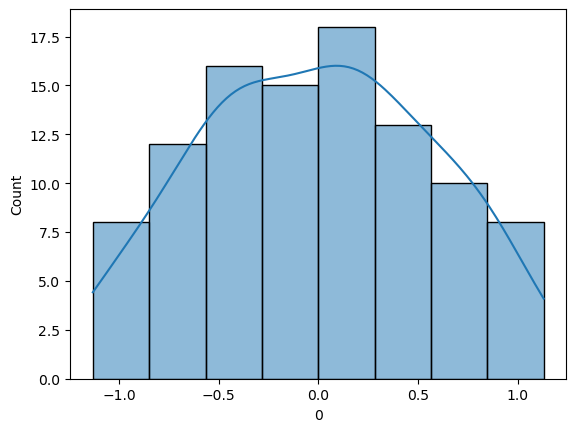

In [8]:
sns.histplot(data[0], kde=True);

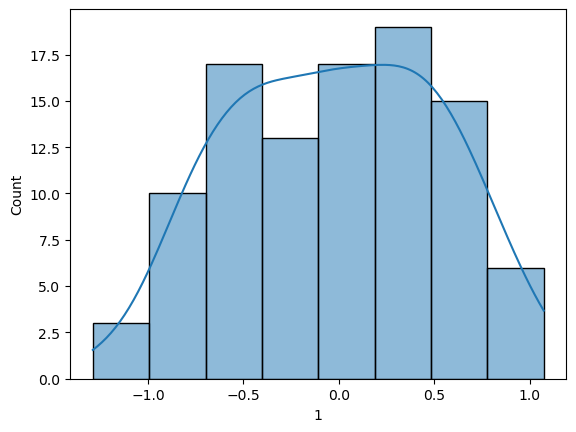

In [9]:
sns.histplot(data[1],kde=True);

In [10]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

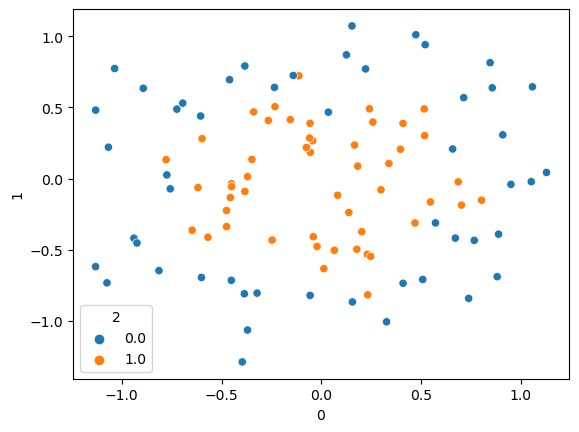

In [11]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [14]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [100]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [101]:
model.get_weights()

[array([[-0.01887178, -0.726948  , -0.82678795,  0.39609098],
        [-0.94997096, -0.45188284,  0.990154  , -0.03262234]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.3964728 , -0.9048178 , -0.59103036],
        [ 0.4470904 ,  0.1177448 , -0.1200285 ],
        [ 0.5967134 ,  0.91499317, -0.27811044],
        [-0.6242754 , -0.6038126 , -0.49898064]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.27077937, -0.08517265],
        [-0.6877526 ,  0.23916817],
        [ 0.34857333,  0.42618477]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.46599174],
        [-0.48580414]], dtype=float32),
 array([0.], dtype=float32)]

In [102]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 12        
                                                                 
 dense_21 (Dense)            (None, 3)                 15        
                                                                 
 dense_22 (Dense)            (None, 2)                 8         
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 0.7028 - accuracy: 0.5417 - val_loss: 0.8026 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7018 - accuracy: 0.5417 - val_loss: 0.7997 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7010 - accuracy: 0.5417 - val_loss: 0.7969 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7003 - accuracy: 0.5417 - val_loss: 0.7925 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.5417 - val_loss: 0.7883 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.5417 - val_loss: 0.7859 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.5417 - val_loss: 0.7837 - val_accuracy: 0.3333
Epoch 8/50
8/8 [=================

In [105]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 65ms/step


array([[0.4387404 ],
       [0.4383872 ],
       [0.43926638],
       [0.4384089 ],
       [0.4383367 ],
       [0.4392978 ],
       [0.43992934],
       [0.43881443],
       [0.4395956 ],
       [0.43951645]], dtype=float32)

In [106]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.5

In [108]:
val_loss = history.history['val_loss']
loss = history.history['loss']

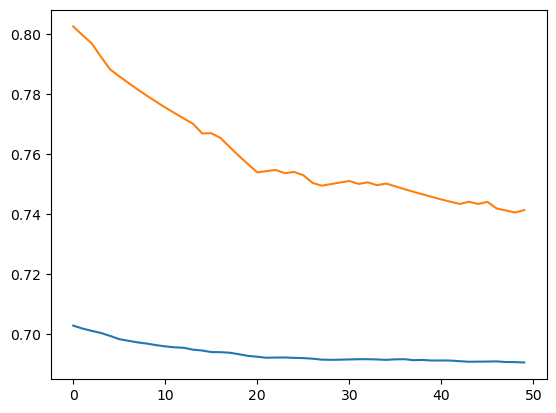

In [109]:
plt.plot(loss)
plt.plot(val_loss)

In [110]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 8s 874us/step


<AxesSubplot: >

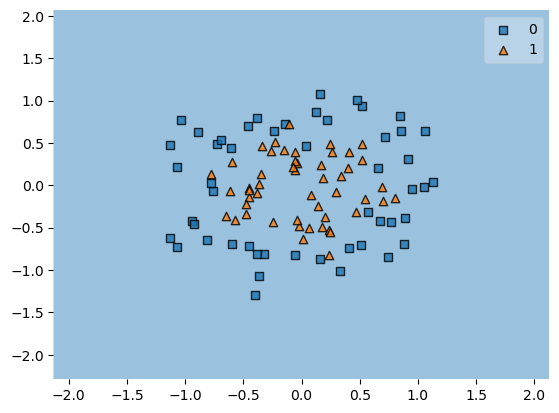

In [111]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 8s 874us/step


<AxesSubplot: >

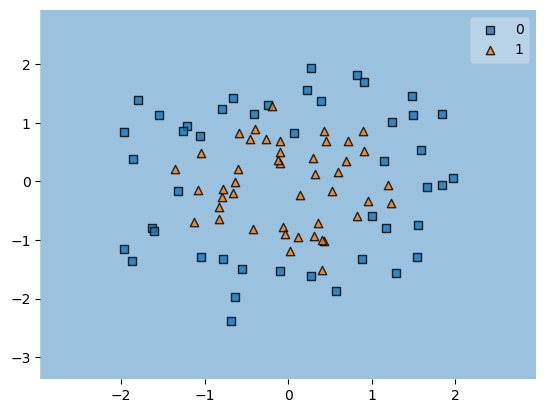

In [112]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 8s 846us/step


<AxesSubplot: >

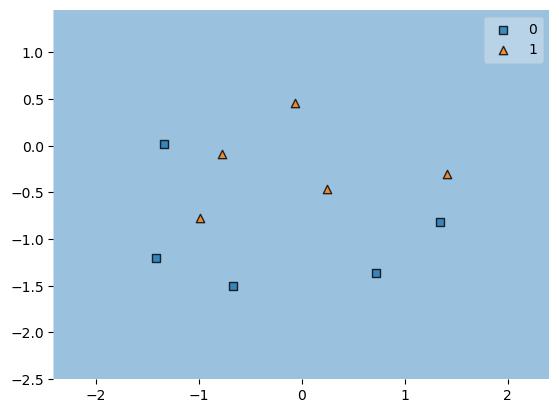

In [113]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [114]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [115]:
model.get_weights()

[array([[-1.0567514 ,  0.88166237,  0.71316934],
        [-0.12419605,  0.13493156, -0.01949358]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.74165773, -0.00487816],
        [ 0.5943699 , -0.7916509 ],
        [-0.48061615, -0.9393699 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0883914 ],
        [-0.44807863]], dtype=float32),
 array([0.], dtype=float32)]

In [116]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 9         
                                                                 
 dense_25 (Dense)            (None, 2)                 8         
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 61ms/step - loss: 4.7295 - accuracy: 0.4167 - val_loss: 3.9193 - val_accuracy: 0.3889
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 4.5641 - accuracy: 0.4167 - val_loss: 3.9172 - val_accuracy: 0.3889
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 4.5449 - accuracy: 0.4167 - val_loss: 3.9164 - val_accuracy: 0.3889
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 4.5279 - accuracy: 0.4167 - val_loss: 3.9171 - val_accuracy: 0.3889
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 4.3720 - accuracy: 0.4028 - val_loss: 3.9153 - val_accuracy: 0.3889
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 4.3380 - accuracy: 0.4028 - val_loss: 3.9160 - val_accuracy: 0.3889
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 4.1650 - accuracy: 0.4028 - val_loss: 3.9135 - val_accuracy: 0.3889
Epoch 8/50
8/8 [===============

In [119]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 151ms/step


array([[-0.07730336],
       [ 0.5389289 ],
       [-0.30806324],
       [ 0.5690306 ],
       [ 0.57394665],
       [-0.2103358 ],
       [-0.308833  ],
       [ 0.38673463],
       [-0.15163338],
       [ 0.20470427]], dtype=float32)

In [120]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.4

In [122]:
val_loss = history.history['val_loss']
loss = history.history['loss']

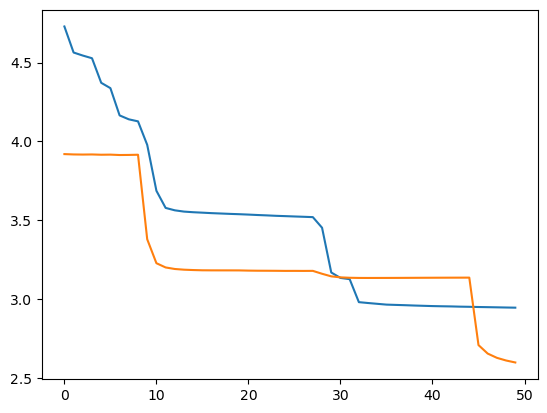

In [123]:
plt.plot(loss)
plt.plot(val_loss)

In [124]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot: >

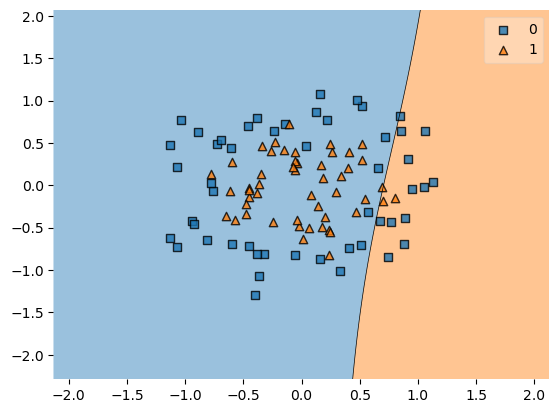

In [125]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 14s 2ms/step


<AxesSubplot: >

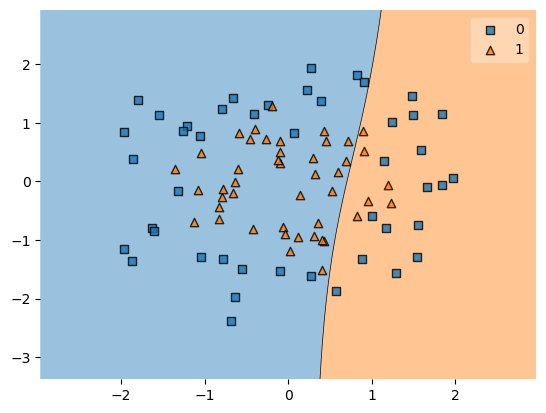

In [126]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 9s 979us/step


<AxesSubplot: >

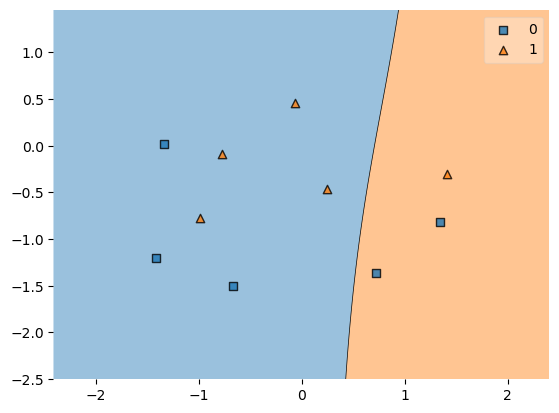

In [127]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu activation func

In [128]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [129]:
model.get_weights()

[array([[ 0.8377471 , -0.84650314, -0.8318981 ,  0.1210717 ,  0.58895886],
        [-0.08926278, -0.3172843 , -0.2030105 , -0.795123  , -0.75934017]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.674629  ,  0.7377626 ,  0.47893345,  0.2816664 ],
        [ 0.07422513, -0.55031216,  0.01036608, -0.0220263 ],
        [ 0.24708402,  0.3002894 , -0.49057844, -0.05861902],
        [ 0.23834133,  0.73724496,  0.4712789 , -0.28294772],
        [-0.01121891,  0.26388133,  0.05554986, -0.17574722]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.98057055,  0.61725855],
        [-0.04333758, -0.06285715],
        [-0.07151055,  0.60625386],
        [-0.8133652 , -0.673182  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.6541842],
        [-1.2383388]], dtype=float32),
 array([0.], dtype=float32)]

In [130]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 5)                 15        
                                                                 
 dense_28 (Dense)            (None, 4)                 24        
                                                                 
 dense_29 (Dense)            (None, 2)                 10        
                                                                 
 dense_30 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 30ms/step - loss: 0.6677 - accuracy: 0.5833 - val_loss: 0.7188 - val_accuracy: 0.4444
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6659 - accuracy: 0.5694 - val_loss: 0.7180 - val_accuracy: 0.4444
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6651 - accuracy: 0.5694 - val_loss: 0.7193 - val_accuracy: 0.4444
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.5694 - val_loss: 0.7183 - val_accuracy: 0.4444
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6624 - accuracy: 0.5694 - val_loss: 0.7171 - val_accuracy: 0.4444
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6613 - accuracy: 0.5833 - val_loss: 0.7154 - val_accuracy: 0.3889
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.5694 - val_loss: 0.7140 - val_accuracy: 0.3889
Epoch 8/50
8/8 [=================

In [133]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 70ms/step


array([[0.37957487],
       [0.36325637],
       [0.36142358],
       [0.26119766],
       [0.2481928 ],
       [0.4277208 ],
       [0.4142933 ],
       [0.53656304],
       [0.47664815],
       [0.5375086 ]], dtype=float32)

In [134]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.7

In [136]:
val_loss = history.history['val_loss']
loss = history.history['loss']

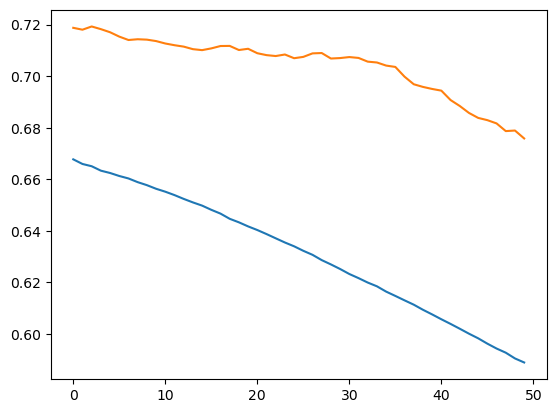

In [137]:
plt.plot(loss)
plt.plot(val_loss)

In [138]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 9s 971us/step


<AxesSubplot: >

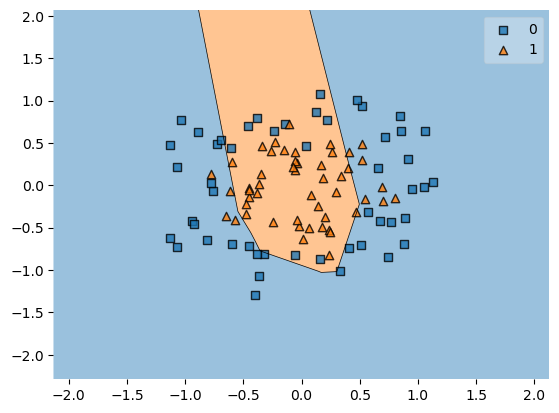

In [139]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

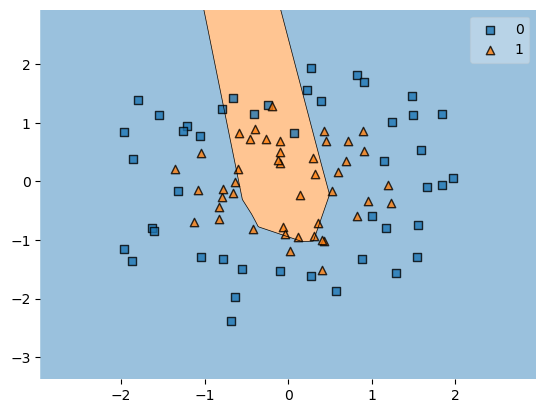

In [140]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 10s 995us/step


<AxesSubplot: >

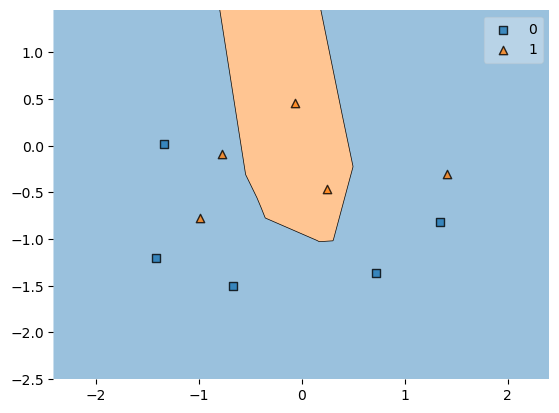

In [141]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)